### Import Dataset

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None

In [42]:
df1 = pd.read_csv('History Matches/epl_06_07.csv')
df2 = pd.read_csv('History Matches/epl_07_08.csv')
df3 = pd.read_csv('History Matches/epl_08_09.csv')
df4 = pd.read_csv('History Matches/epl_09_10.csv')
df5 = pd.read_csv('History Matches/epl_10_11.csv')
df6 = pd.read_csv('History Matches/epl_11_12.csv')
df7 = pd.read_csv('History Matches/epl_12_13.csv')
df8 = pd.read_csv('History Matches/epl_13_14.csv')
df9 = pd.read_csv('History Matches/epl_14_15.csv')
df10 = pd.read_csv('History Matches/epl_15_16.csv')
df11 = pd.read_csv('History Matches/epl_16_17.csv')
df12 = pd.read_csv('History Matches/epl_17_18.csv')
df13 = pd.read_csv('History Matches/epl_18_19.csv')
df14 = pd.read_csv('History Matches/epl_19_20.csv')
df15 = pd.read_csv('History Matches/epl_20_21.csv')
df16 = pd.read_csv('History Matches/epl_21_22.csv')
df17 = pd.read_csv('History Matches/epl_22_23.csv')

In [43]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], ignore_index=True)

In [44]:
df.head()

date season                           venue         home_team  \
0  19/08/2006  06/07         Bramall Lane, Sheffield  Sheffield United   
1  19/08/2006  06/07        Fratton Park, Portsmouth        Portsmouth   
2  19/08/2006  06/07        Goodison Park, Liverpool           Everton   
3  19/08/2006  06/07  Sports Direct Arena, Newcastle  Newcastle United   
4  19/08/2006  06/07       Madejski Stadium, Reading           Reading   

          away_team  ht_home_score  ht_away_score  home_score  away_score  \
0         Liverpool              0              0           1           1   
1  Blackburn Rovers              1              0           3           0   
2           Watford              1              0           2           1   
3    Wigan Athletic              1              0           2           1   
4     Middlesbrough              2              2           3           2   

   home_possession_%  away_possession_%  home_shots_on_target  \
0               0.41               0.58                     1   
1               0.44               0.55                    11   
2               0.46               0.53                     2   
3               0.55               0.44                     5   
4               0.52               0.47                     8   

   away_shots_on_target  home_shots  away_shots  home_touches  away_touches  \
0                     4           6          15           451           569   
1                     3          21           8           415           527   
2                     7           8          13           460           493   
3                     4           8          13           519           448   
4                     7          14          11           515           441   

   home_passes  away_passes  home_tackles  away_tackles  home_clearances  \
0          272          366            22            29               64   
1          279          327            23            19               15   
2          288          321            17            24               61   
3          352          278            27            33               15   
4          335          328            23            28                9   

   away_clearances  home_corners  away_corners  home_offsides  away_offsides  \
0               39             0            12              3              5   
1               28             6             2              5              0   
2               32             0             6              5              1   
3               16             4            11              6              3   
4               18             8             2              0              1   

   home_yellow_cards  away_yellow_cards  home_red_cards  away_red_cards  \
0                  1                  2               0               0   
1                  2                  0               0               1   
2                  2                  2               0               0   
3                  1                  2               0               0   
4                  1                  3               0               0   

   home_fouls  away_fouls          referee  
0          12          17       Rob Styles  
1          22          17       Alan Wiley  
2          12          15     Peter Walton  
3          18          19  Martin Atkinson  
4           7          16      Mark Halsey

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6404 non-null   object 
 1   season                6404 non-null   object 
 2   venue                 6404 non-null   object 
 3   home_team             6404 non-null   object 
 4   away_team             6404 non-null   object 
 5   ht_home_score         6404 non-null   int64  
 6   ht_away_score         6404 non-null   int64  
 7   home_score            6404 non-null   int64  
 8   away_score            6404 non-null   int64  
 9   home_possession_%     6404 non-null   float64
 10  away_possession_%     6404 non-null   float64
 11  home_shots_on_target  6404 non-null   int64  
 12  away_shots_on_target  6404 non-null   int64  
 13  home_shots            6404 non-null   int64  
 14  away_shots            6404 non-null   int64  
 15  home_touches         

### Feature Engineering

#### Change stadium name

In [46]:
df['venue'] = df['venue'].replace("St James' Park, Newcastle", "St. James' Park, Newcastle")

#### Mapping Football Match Result

In [47]:
df['result'] = 'D' 
df.loc[df['home_score'] > df['away_score'], 'result'] = 'W'  
df.loc[df['home_score'] < df['away_score'], 'result'] = 'L'  

In [48]:
df.head()

date season                           venue         home_team  \
0  19/08/2006  06/07         Bramall Lane, Sheffield  Sheffield United   
1  19/08/2006  06/07        Fratton Park, Portsmouth        Portsmouth   
2  19/08/2006  06/07        Goodison Park, Liverpool           Everton   
3  19/08/2006  06/07  Sports Direct Arena, Newcastle  Newcastle United   
4  19/08/2006  06/07       Madejski Stadium, Reading           Reading   

          away_team  ht_home_score  ht_away_score  home_score  away_score  \
0         Liverpool              0              0           1           1   
1  Blackburn Rovers              1              0           3           0   
2           Watford              1              0           2           1   
3    Wigan Athletic              1              0           2           1   
4     Middlesbrough              2              2           3           2   

   home_possession_%  away_possession_%  home_shots_on_target  \
0               0.41               0.58                     1   
1               0.44               0.55                    11   
2               0.46               0.53                     2   
3               0.55               0.44                     5   
4               0.52               0.47                     8   

   away_shots_on_target  home_shots  away_shots  home_touches  away_touches  \
0                     4           6          15           451           569   
1                     3          21           8           415           527   
2                     7           8          13           460           493   
3                     4           8          13           519           448   
4                     7          14          11           515           441   

   home_passes  away_passes  home_tackles  away_tackles  home_clearances  \
0          272          366            22            29               64   
1          279          327            23            19               15   
2          288          321            17            24               61   
3          352          278            27            33               15   
4          335          328            23            28                9   

   away_clearances  home_corners  away_corners  home_offsides  away_offsides  \
0               39             0            12              3              5   
1               28             6             2              5              0   
2               32             0             6              5              1   
3               16             4            11              6              3   
4               18             8             2              0              1   

   home_yellow_cards  away_yellow_cards  home_red_cards  away_red_cards  \
0                  1                  2               0               0   
1                  2                  0               0               1   
2                  2                  2               0               0   
3                  1                  2               0               0   
4                  1                  3               0               0   

   home_fouls  away_fouls          referee result  
0          12          17       Rob Styles      D  
1          22          17       Alan Wiley      W  
2          12          15     Peter Walton      W  
3          18          19  Martin Atkinson      W  
4           7          16      Mark Halsey      W

In [49]:
df['home_team'].unique()

array(['Sheffield United', 'Portsmouth', 'Everton', 'Newcastle United',
       'Reading', 'West Ham', 'Arsenal', 'Bolton Wanderers', 'Chelsea',
       'Manchester United', 'Watford', 'Tottenham', 'Aston Villa',
       'Blackburn Rovers', 'Charlton Athletic', 'Fulham', 'Middlesbrough',
       'Man City', 'Wigan Athletic', 'Liverpool', 'Derby County',
       'Sunderland', 'Birmingham City', 'Hull City', 'Stoke', 'West Brom',
       'Burnley', 'Wolverhampton Wanderers', 'Blackpool',
       'Queens Park Rangers', 'Swansea', 'Norwich City', 'Southampton',
       'Crystal Palace', 'Cardiff City', 'Leicester', 'Bournemouth',
       'Brighton', 'Huddersfield', 'Leeds', 'Brentford',
       'Manchester City', 'Nottingham Forest'], dtype=object)

#### Create 'is_derby' feature

In [50]:
derby_teams = [
    ['Liverpool', 'Everton'],
    ['Arsenal', 'Tottenham'],
    ['Aston Villa', 'Birmingham City', 'Wolverhampton Wanderers'],
    ['Manchester United', 'Manchester City'],
    ['Newcastle United', 'Sunderland'],
    ['Portsmouth', 'Southampton'],
    ['Chelsea', 'Fulham', 'Queens Park Rangers'],
    ['Derby County', 'Leicester', 'Nottingham Forest'],
    ['Blackburn Rovers', 'Bolton Wanderers', 'Burnley', 'Blackpool'],
    ['Middlesbrough', 'Sunderland'],
    ['Stoke City', 'Port Vale'],
    ['Leeds United', 'Huddersfield Town'],
    ['Sheffield United', 'Sheffield Wednesday'],
    ['Norwich City', 'Ipswich Town'],
    ['Cardiff City', 'Swansea City'],
    ['Southampton', 'Portsmouth'],
    ['Bristol City', 'Bristol Rovers'],
    ['Nottingham Forest', 'Notts County']
]

# Fungsi untuk menentukan apakah pertandingan adalah derby
def is_derby(home_team, away_team):
    for derby_pair in derby_teams:
        if home_team in derby_pair and away_team in derby_pair:
            return 1
    return 0

# Menentukan apakah setiap pertandingan dalam df adalah derby atau bukan
is_derby_list = [is_derby(home, away) for home, away in zip(df['home_team'], df['away_team'])]

df['is_derby'] = is_derby_list
df['is_derby'] = df['is_derby'].astype(str)

#### Create **previous five matches total points** feature

In [51]:
def get_points(result, home=True):
    if result == 'W':
        return 3 if home else 0
    elif result == 'D':
        return 1
    elif result == 'L':
        return 0 if home else 3
    return 0

# Menambahkan kolom poin untuk home dan away
df['home_points'] = df.apply(lambda row: get_points(row['result'], home=True), axis=1)
df['away_points'] = df.apply(lambda row: get_points(row['result'], home=False), axis=1)

df['home_total_points_last_5'] = 0
df['away_total_points_last_5'] = 0

# Mengelompokkan berdasarkan home_team dan away_team
home_group = df.groupby('home_team')
away_group = df.groupby('away_team')

for home_team, group in home_group:
    group = group.sort_values(by='date')
    group['home_total_points_last_5'] = group['home_points'].rolling(window=5, min_periods=1).sum()
    df.loc[group.index, 'home_total_points_last_5'] = group['home_total_points_last_5']

for away_team, group in away_group:
    group = group.sort_values(by='date')
    group['away_total_points_last_5'] = group['away_points'].rolling(window=5, min_periods=1).sum()
    df.loc[group.index, 'away_total_points_last_5'] = group['away_total_points_last_5']

#### Create **head-to-head** feature

In [52]:
df['home_h2h_points_last_5'] = 0
df['away_h2h_points_last_5'] = 0

# Mengelompokkan berdasarkan pasangan tim
pairs = df.groupby(['home_team', 'away_team'])

for (home_team, away_team), group in pairs:
    group = group.sort_values(by='date')
    group['home_h2h_points_last_5'] = group['home_points'].rolling(window=5, min_periods=1).sum()
    group['away_h2h_points_last_5'] = group['away_points'].rolling(window=5, min_periods=1).sum()
    
    
    df.loc[group.index, 'home_h2h_points_last_5'] = group['home_h2h_points_last_5']
    df.loc[group.index, 'away_h2h_points_last_5'] = group['away_h2h_points_last_5']
    
df.drop(['home_points', 'away_points'], axis=1, inplace=True)

In [53]:
# df[(df['away_team'] == 'Arsenal')][['date', 'home_team', 'away_team', 'result', 'home_total_points_last_5', 'away_total_points_last_5', 'total_unbeaten_home_matches', 'total_unbeaten_away_matches']].head(30)
# df[(df['home_team'] == 'Arsenal') & (df['away_team'] == 'Tottenham')][['date', 'home_team', 'away_team', 'result', 'home_h2h_points_last_5', 'away_h2h_points_last_5']].head(30)

In [54]:
df.head()

date season                           venue         home_team  \
0  19/08/2006  06/07         Bramall Lane, Sheffield  Sheffield United   
1  19/08/2006  06/07        Fratton Park, Portsmouth        Portsmouth   
2  19/08/2006  06/07        Goodison Park, Liverpool           Everton   
3  19/08/2006  06/07  Sports Direct Arena, Newcastle  Newcastle United   
4  19/08/2006  06/07       Madejski Stadium, Reading           Reading   

          away_team  ht_home_score  ht_away_score  home_score  away_score  \
0         Liverpool              0              0           1           1   
1  Blackburn Rovers              1              0           3           0   
2           Watford              1              0           2           1   
3    Wigan Athletic              1              0           2           1   
4     Middlesbrough              2              2           3           2   

   home_possession_%  away_possession_%  home_shots_on_target  \
0               0.41               0.58                     1   
1               0.44               0.55                    11   
2               0.46               0.53                     2   
3               0.55               0.44                     5   
4               0.52               0.47                     8   

   away_shots_on_target  home_shots  away_shots  home_touches  away_touches  \
0                     4           6          15           451           569   
1                     3          21           8           415           527   
2                     7           8          13           460           493   
3                     4           8          13           519           448   
4                     7          14          11           515           441   

   home_passes  away_passes  home_tackles  away_tackles  home_clearances  \
0          272          366            22            29               64   
1          279          327            23            19               15   
2          288          321            17            24               61   
3          352          278            27            33               15   
4          335          328            23            28                9   

   away_clearances  home_corners  away_corners  home_offsides  away_offsides  \
0               39             0            12              3              5   
1               28             6             2              5              0   
2               32             0             6              5              1   
3               16             4            11              6              3   
4               18             8             2              0              1   

   home_yellow_cards  away_yellow_cards  home_red_cards  away_red_cards  \
0                  1                  2               0               0   
1                  2                  0               0               1   
2                  2                  2               0               0   
3                  1                  2               0               0   
4                  1                  3               0               0   

   home_fouls  away_fouls          referee result is_derby  \
0          12          17       Rob Styles      D       No   
1          22          17       Alan Wiley      W       No   
2          12          15     Peter Walton      W       No   
3          18          19  Martin Atkinson      W       No   
4           7          16      Mark Halsey      W       No   

   home_total_points_last_5  away_total_points_last_5  home_h2h_points_last_5  \
0                         5                         9                       1   
1                        15                         4                       4   
2                        12                         6                      11   
3                         7                         0                      11   
4                        10                         4               

#### Drop features

In [55]:
df.drop(['date', 'season', 'home_score', 'away_score'], axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   venue                     6404 non-null   object 
 1   home_team                 6404 non-null   object 
 2   away_team                 6404 non-null   object 
 3   ht_home_score             6404 non-null   int64  
 4   ht_away_score             6404 non-null   int64  
 5   home_possession_%         6404 non-null   float64
 6   away_possession_%         6404 non-null   float64
 7   home_shots_on_target      6404 non-null   int64  
 8   away_shots_on_target      6404 non-null   int64  
 9   home_shots                6404 non-null   int64  
 10  away_shots                6404 non-null   int64  
 11  home_touches              6404 non-null   int64  
 12  away_touches              6404 non-null   int64  
 13  home_passes               6404 non-null   int64  
 14  away_pas

#### Scaling 

In [57]:
cols = df.select_dtypes(include=['int']).columns

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [58]:
df.head()

venue         home_team         away_team  \
0         Bramall Lane, Sheffield  Sheffield United         Liverpool   
1        Fratton Park, Portsmouth        Portsmouth  Blackburn Rovers   
2        Goodison Park, Liverpool           Everton           Watford   
3  Sports Direct Arena, Newcastle  Newcastle United    Wigan Athletic   
4       Madejski Stadium, Reading           Reading     Middlesbrough   

   ht_home_score  ht_away_score  home_possession_%  away_possession_%  \
0            0.0            0.0               0.41               0.58   
1            0.2            0.0               0.44               0.55   
2            0.2            0.0               0.46               0.53   
3            0.2            0.0               0.55               0.44   
4            0.4            0.4               0.52               0.47   

   home_shots_on_target  away_shots_on_target  home_shots  away_shots  \
0              0.058824              0.266667    0.136364    0.454545   
1              0.647059              0.200000    0.477273    0.242424   
2              0.117647              0.466667    0.181818    0.393939   
3              0.294118              0.266667    0.181818    0.393939   
4              0.470588              0.466667    0.318182    0.333333   

   home_touches  away_touches  home_passes  away_passes  home_tackles  \
0      0.140606      0.334550     0.136047     0.263285      0.422222   
1      0.096970      0.283455     0.144186     0.216184      0.444444   
2      0.151515      0.242092     0.154651     0.208937      0.311111   
3      0.223030      0.187348     0.229070     0.157005      0.533333   
4      0.218182      0.178832     0.209302     0.217391      0.444444   

   away_tackles  home_clearances  away_clearances  home_corners  away_corners  \
0      0.553191         0.598131         0.296875           0.0      0.631579   
1      0.340426         0.140187         0.210938           0.3      0.105263   
2      0.446809         0.570093         0.242188           0.0      0.315789   
3      0.638298         0.140187         0.117188           0.2      0.578947   
4      0.531915         0.084112         0.132812           0.4      0.105263   

   home_offsides  away_offsides  home_yellow_cards  away_yellow_cards  \
0       0.214286       0.416667           0.142857           0.222222   
1       0.357143       0.000000           0.285714           0.000000   
2       0.357143       0.083333           0.285714           0.222222   
3       0.428571       0.250000           0.142857           0.222222   
4       0.000000       0.083333           0.142857           0.333333   

   home_red_cards  away_red_cards  home_fouls  away_fouls          referee  \
0             0.0             0.0    0.352941    0.571429       Rob Styles   
1             0.0             0.5    0.647059    0.571429       Alan Wiley   
2             0.0             0.0    0.352941    0.500000     Peter Walton   
3             0.0             0.0    0.529412    0.642857  Martin Atkinson   
4             0.0             0.0    0.205882    0.535714      Mark Halsey   

  result is_derby  home_total_points_last_5  away_total_points_last_5  \
0      D       No                  0.333333                  0.600000   
1      W       No                  1.000000                  0.266667   
2      W       No                  0.800000                  0.400000   
3      W       No                  0.466667                  0.000000   
4      W       No                  0.666667                  0.266667   

   home_h2h_points_last_5  away_h2h_points_last_5  
0                0.066667                0.066667  
1                0.266667                0.066667  
2                0.733333                0.133333  
3                0.733333                0.133333  
4                0.266667                0.066667

#### Encoding features

In [59]:
le = LabelEncoder()
le_ref = LabelEncoder()
le_venue = LabelEncoder()

df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.transform(df['away_team'])
df['referee'] = le_ref.fit_transform(df['referee'])
df['venue'] = le_venue.fit_transform(df['venue'])

ordinal_mapping = {
    'result': {'L': 0, 'D': 1, 'W': 2},
    'derby': {'No': 0, 'Yes': 1},
}

df['result'] = df['result'].map(ordinal_mapping['result'])
df['is_derby'] = df['is_derby'].map(ordinal_mapping['derby'])

In [60]:
df.head()

venue  home_team  away_team  ht_home_score  ht_away_score  \
0      4         32         21            0.0            0.0   
1     14         29          3            0.2            0.0   
2     16         15         38            0.2            0.0   
3     33         26         41            0.2            0.0   
4     27         31         25            0.4            0.4   

   home_possession_%  away_possession_%  home_shots_on_target  \
0               0.41               0.58              0.058824   
1               0.44               0.55              0.647059   
2               0.46               0.53              0.117647   
3               0.55               0.44              0.294118   
4               0.52               0.47              0.470588   

   away_shots_on_target  home_shots  away_shots  home_touches  away_touches  \
0              0.266667    0.136364    0.454545      0.140606      0.334550   
1              0.200000    0.477273    0.242424      0.096970      0.283455   
2              0.466667    0.181818    0.393939      0.151515      0.242092   
3              0.266667    0.181818    0.393939      0.223030      0.187348   
4              0.466667    0.318182    0.333333      0.218182      0.178832   

   home_passes  away_passes  home_tackles  away_tackles  home_clearances  \
0     0.136047     0.263285      0.422222      0.553191         0.598131   
1     0.144186     0.216184      0.444444      0.340426         0.140187   
2     0.154651     0.208937      0.311111      0.446809         0.570093   
3     0.229070     0.157005      0.533333      0.638298         0.140187   
4     0.209302     0.217391      0.444444      0.531915         0.084112   

   away_clearances  home_corners  away_corners  home_offsides  away_offsides  \
0         0.296875           0.0      0.631579       0.214286       0.416667   
1         0.210938           0.3      0.105263       0.357143       0.000000   
2         0.242188           0.0      0.315789       0.357143       0.083333   
3         0.117188           0.2      0.578947       0.428571       0.250000   
4         0.132812           0.4      0.105263       0.000000       0.083333   

   home_yellow_cards  away_yellow_cards  home_red_cards  away_red_cards  \
0           0.142857           0.222222             0.0             0.0   
1           0.285714           0.000000             0.0             0.5   
2           0.285714           0.222222             0.0             0.0   
3           0.142857           0.222222             0.0             0.0   
4           0.142857           0.333333             0.0             0.0   

   home_fouls  away_fouls  referee  result  is_derby  \
0    0.352941    0.571429       36       1         0   
1    0.647059    0.571429        0       2         0   
2    0.352941    0.500000       34       2         0   
3    0.529412    0.642857       25       2         0   
4    0.205882    0.535714       24       2         0   

   home_total_points_last_5  away_total_points_last_5  home_h2h_points_last_5  \
0                  0.333333                  0.600000                0.066667   
1                  1.000000                  0.266667                0.266667   
2                  0.800000                  0.400000                0.733333   
3                  0.466667                  0.000000                0.733333   
4                  0.666667                  0.266667                0.266667   

   away_h2h_points_last_5  
0                0.066667  
1                0.066667  
2                0.133333  
3                0.133333  
4                0.066667

In [61]:
df.shape

(6404, 36)

In [62]:
df.columns

Index(['venue', 'home_team', 'away_team', 'ht_home_score', 'ht_away_score',
       'home_possession_%', 'away_possession_%', 'home_shots_on_target',
       'away_shots_on_target', 'home_shots', 'away_shots', 'home_touches',
       'away_touches', 'home_passes', 'away_passes', 'home_tackles',
       'away_tackles', 'home_clearances', 'away_clearances', 'home_corners',
       'away_corners', 'home_offsides', 'away_offsides', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_fouls',
       'away_fouls', 'referee', 'result', 'is_derby',
       'home_total_points_last_5', 'away_total_points_last_5',
       'home_h2h_points_last_5', 'away_h2h_points_last_5'],
      dtype='object')

### Distribusi Data

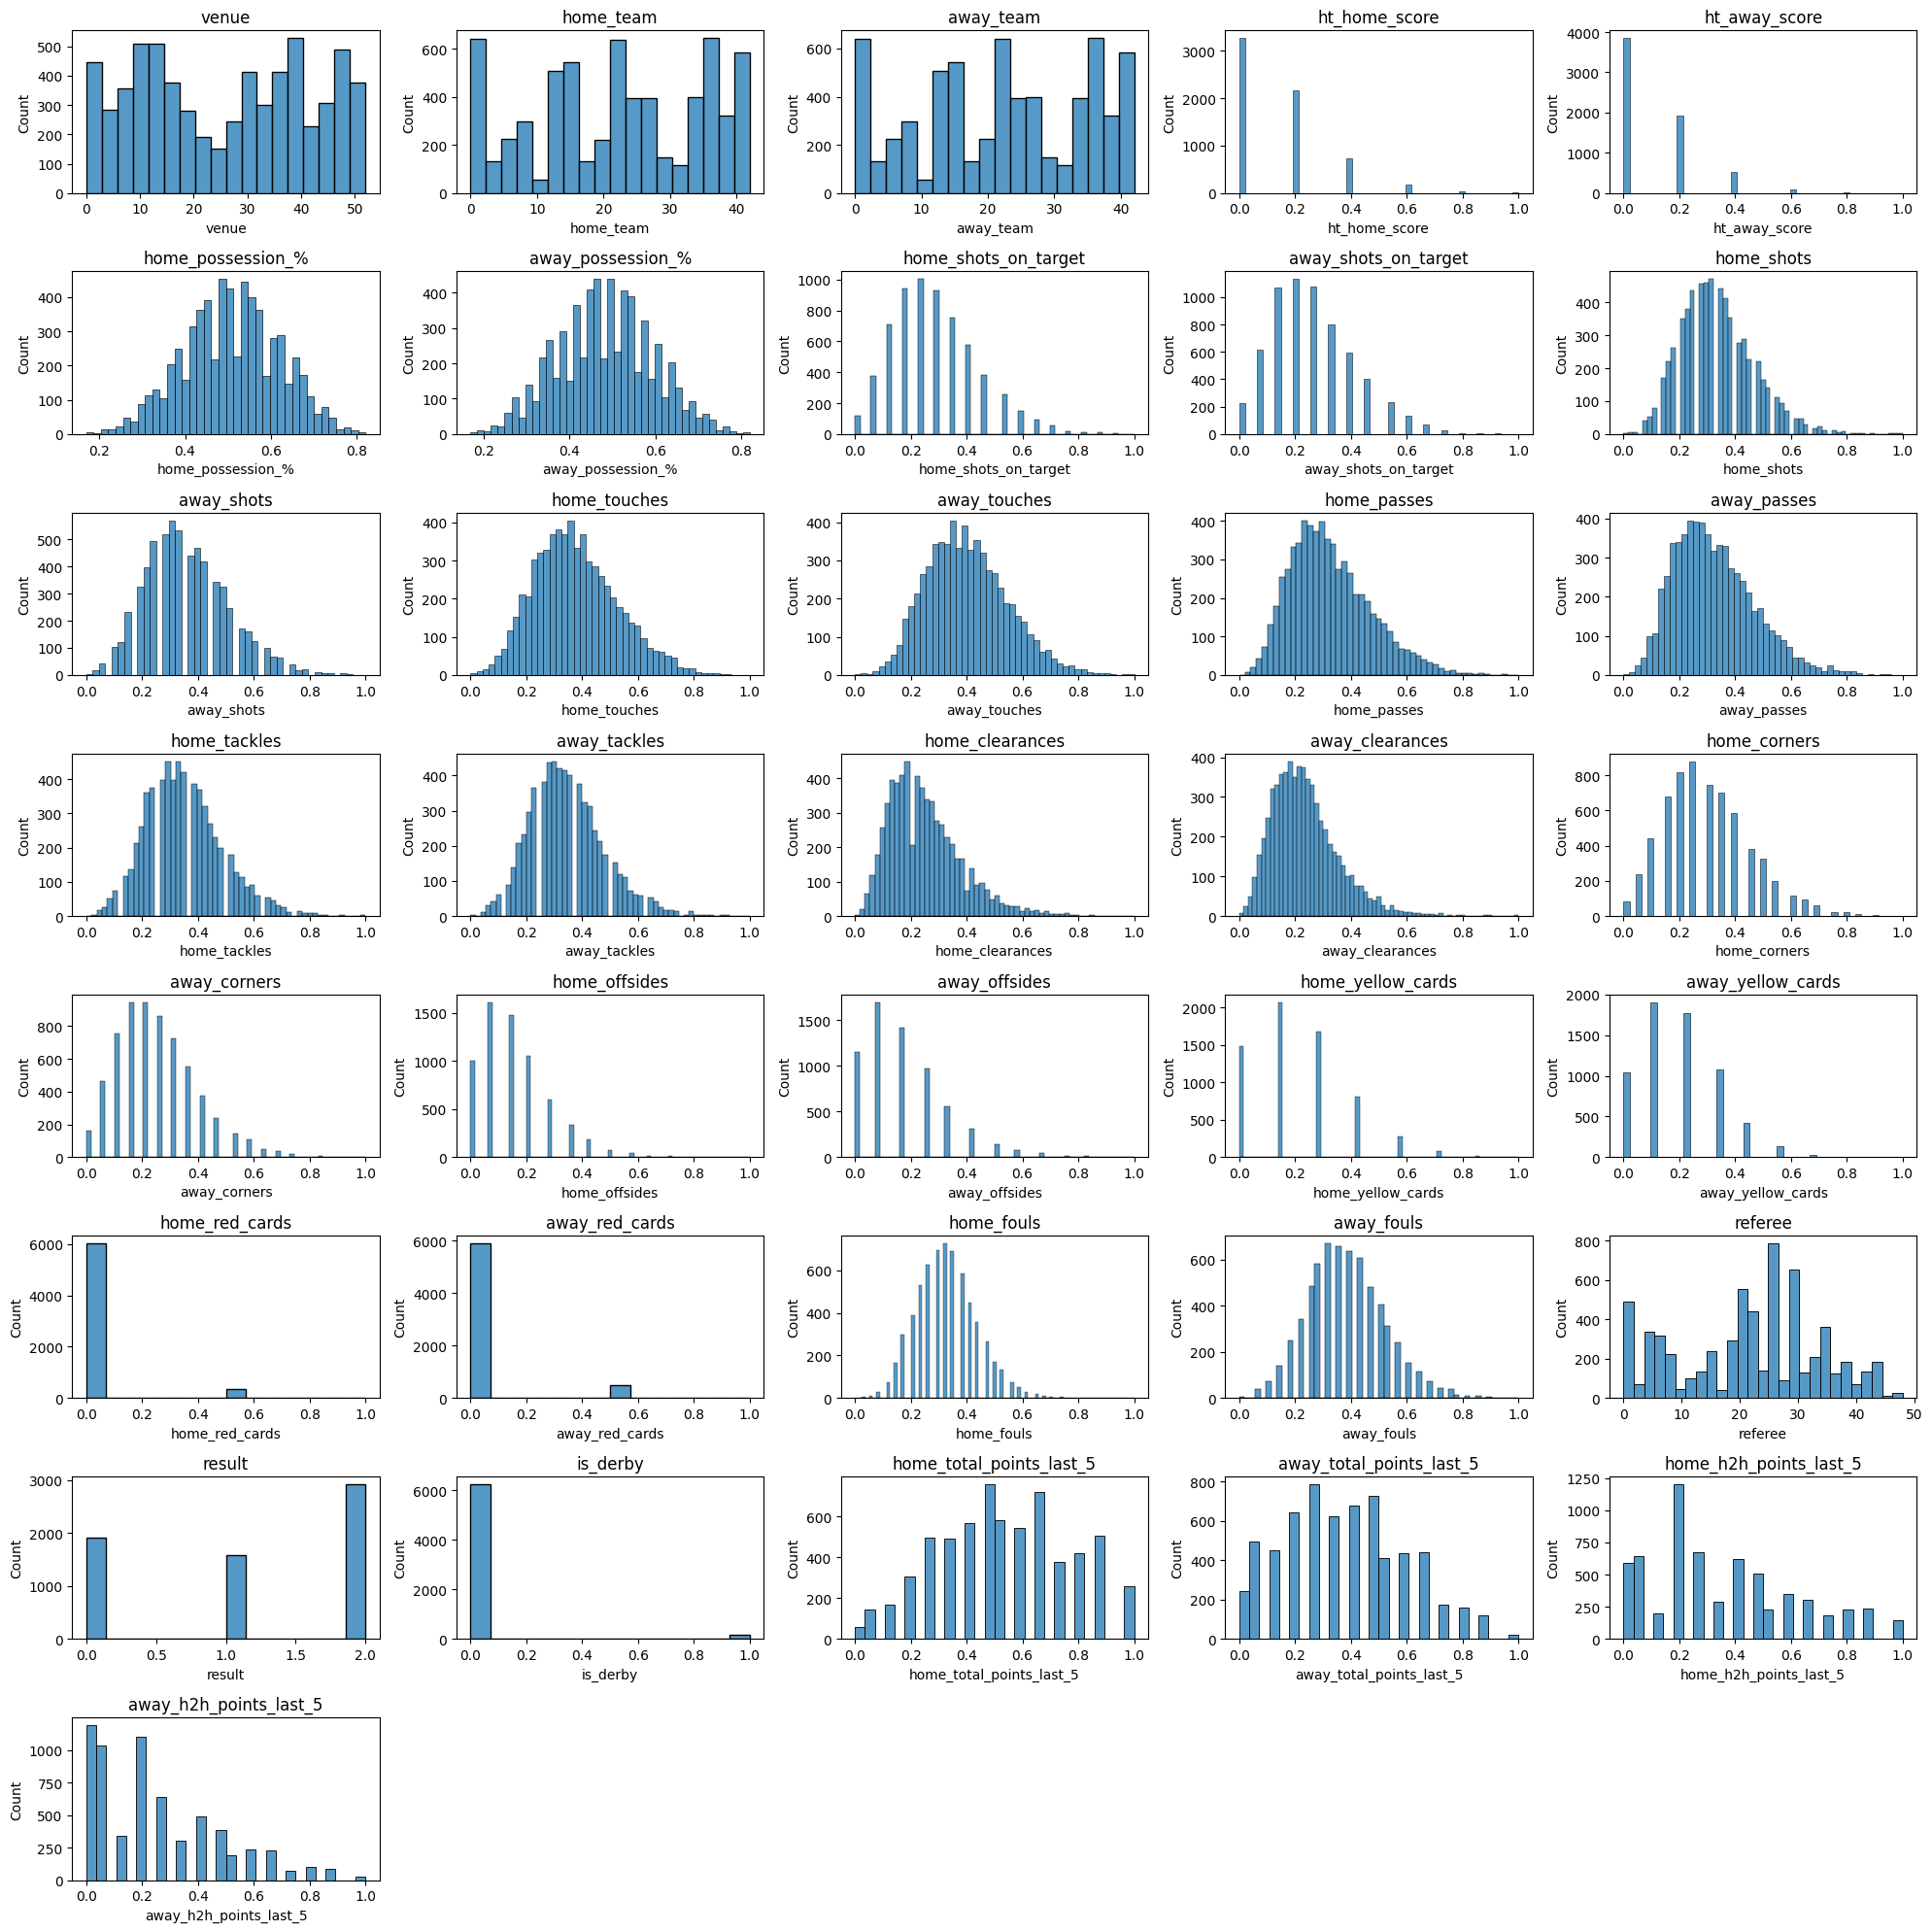

In [64]:
data = df.iloc[:, :]

rows = 8
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Melakukan flatten pada axes supaya mempermudah iterasi
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(data.columns):
        sns.histplot(data=data, x=data.columns[i], ax=ax)
        ax.set_title(data.columns[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [77]:
team_map = {
    "Arsenal": 0, "Aston Villa": 1, "Bournemouth": 6,
    "Brentford": 7, "Brighton & Hove Albion": 8,
    "Burnley": 9, "Chelsea": 12, "Crystal Palace": 13,
    "Everton": 15, "Fulham": 16, "Liverpool": 21,
    "Manchester City": 22, "Manchester United": 23,
    "Newcastle United": 26, "Nottingham Forest": 28,
    "Sheffield United": 32, "Tottenham Hostpur": 37,
    "West Ham United": 40, "Wolverhampton Wanderers": 42
}

team_map.keys()

dict_keys(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton & Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Tottenham Hostpur', 'West Ham United', 'Wolverhampton Wanderers'])

In [78]:
df.columns

Index(['venue', 'home_team', 'away_team', 'ht_home_score', 'ht_away_score',
       'home_possession_%', 'away_possession_%', 'home_shots_on_target',
       'away_shots_on_target', 'home_shots', 'away_shots', 'home_touches',
       'away_touches', 'home_passes', 'away_passes', 'home_tackles',
       'away_tackles', 'home_clearances', 'away_clearances', 'home_corners',
       'away_corners', 'home_offsides', 'away_offsides', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_fouls',
       'away_fouls', 'referee', 'result', 'is_derby',
       'home_total_points_last_5', 'away_total_points_last_5',
       'home_h2h_points_last_5', 'away_h2h_points_last_5'],
      dtype='object')

### Modelling

#### Splitting Data

In [65]:
X = df.drop('result', axis=1)
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [66]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Initializing Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier()
}

# Setting up the parameter grids for each algorithm
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1.0, 10.0],
                            'penalty': ['l1', 'l2', 'elasticnet'],
                            'solver': ['newton-cg', 'lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': [50, 100, 150],
                    'max_depth': [None, 10, 20],
                    'max_features': ['auto', 'sqrt', 'log2']},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]},
    'CatBoost': {'iterations': [50, 100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'depth': [4, 6, 8],},
    'LightGBM': {'n_estimators': [50, 100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 5, 7]}
}

# Setting up multiple GridSearchCV objects, 1 for each algorithm
gridcvs = {}
inner_cv = StratifiedKFold(n_splits=2, shuffle=True)

for name, clf in classifiers.items():
    gcv = GridSearchCV(estimator=clf,
                       param_grid=param_grids[name],
                       scoring='balanced_accuracy',
                       n_jobs=1,
                       cv=inner_cv,
                       verbose=0,
                       refit=True)
    gridcvs[name] = gcv

In [67]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)

results = []
for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv,
                                   scoring='balanced_accuracy',
                                   n_jobs=1)
    mean_score = nested_score.mean() * 100
    std_score = nested_score.std() * 100
    results.append({'Model': name, 'Mean Outer Balanced Accuracy': mean_score, 'Std Balanced Accuracy': std_score})


0:	learn: 1.0630163	total: 163ms	remaining: 7.97s
1:	learn: 1.0303921	total: 165ms	remaining: 3.96s
2:	learn: 1.0004729	total: 168ms	remaining: 2.63s
3:	learn: 0.9721688	total: 171ms	remaining: 1.97s
4:	learn: 0.9474119	total: 175ms	remaining: 1.57s
5:	learn: 0.9223349	total: 178ms	remaining: 1.3s
6:	learn: 0.9009677	total: 180ms	remaining: 1.1s
7:	learn: 0.8772989	total: 182ms	remaining: 955ms
8:	learn: 0.8561918	total: 184ms	remaining: 839ms
9:	learn: 0.8378331	total: 186ms	remaining: 744ms
10:	learn: 0.8217951	total: 189ms	remaining: 669ms
11:	learn: 0.8056765	total: 194ms	remaining: 614ms
12:	learn: 0.7914318	total: 196ms	remaining: 559ms
13:	learn: 0.7782856	total: 199ms	remaining: 511ms
14:	learn: 0.7652947	total: 201ms	remaining: 469ms
15:	learn: 0.7528926	total: 203ms	remaining: 431ms
16:	learn: 0.7428427	total: 207ms	remaining: 402ms
17:	learn: 0.7318991	total: 209ms	remaining: 372ms
18:	learn: 0.7201798	total: 211ms	remaining: 344ms
19:	learn: 0.7102931	total: 213ms	remaining

C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [68]:
results_df = pd.DataFrame(results)
results_df.rename(columns={"Mean Balanced Accuracy":"Mean Outer Balanced Accuracy"}, inplace=True)
results_df.sort_values(by='Mean Outer Balanced Accuracy', ascending=False).reset_index(drop=True)

Model  Mean Outer Balanced Accuracy  Std Balanced Accuracy
0             LightGBM                     83.605815               0.929807
1             CatBoost                     81.837495               0.650424
2        Random Forest                     78.566957               0.406545
3  Logistic Regression                     71.771715               0.614895
4                  KNN                     44.247661               1.232038

#### Fitting model to train and test data

In [69]:
models_list = ['Logistic Regression', 'CatBoost', 'Random Forest', 'LightGBM', 'KNN']

results = []

for model_name in models_list:
    best_algo = gridcvs[model_name]
    best_algo.fit(X_train, y_train)
    train_acc = balanced_accuracy_score(y_train, best_algo.predict(X_train))
    test_acc = balanced_accuracy_score(y_test, best_algo.predict(X_test))
    
    results.append({
        'Model': model_name,
        'CV Test Fold Balanced Acc. (%)': 100 * best_algo.best_score_,
        'Best Parameters': str(best_algo.best_params_),
        'Training Balanced Accuracy (%)': 100 * train_acc,
        'Test Balanced Accuracy (%)': 100 * test_acc
    })

C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

0:	learn: 1.0634692	total: 5.48ms	remaining: 269ms
1:	learn: 1.0315110	total: 7.91ms	remaining: 190ms
2:	learn: 0.9954262	total: 9.85ms	remaining: 154ms
3:	learn: 0.9678815	total: 11.7ms	remaining: 135ms
4:	learn: 0.9410373	total: 13.8ms	remaining: 124ms
5:	learn: 0.9189166	total: 15.9ms	remaining: 117ms
6:	learn: 0.8983672	total: 20ms	remaining: 123ms
7:	learn: 0.8771748	total: 22.1ms	remaining: 116ms
8:	learn: 0.8583687	total: 24.1ms	remaining: 110ms
9:	learn: 0.8387398	total: 26ms	remaining: 104ms
10:	learn: 0.8230880	total: 28ms	remaining: 99.2ms
11:	learn: 0.8071723	total: 29.9ms	remaining: 94.8ms
12:	learn: 0.7916395	total: 32.1ms	remaining: 91.3ms
13:	learn: 0.7772014	total: 35.4ms	remaining: 90.9ms
14:	learn: 0.7649034	total: 37.7ms	remaining: 88ms
15:	learn: 0.7523392	total: 39.7ms	remaining: 84.3ms
16:	learn: 0.7400869	total: 41.6ms	remaining: 80.7ms
17:	learn: 0.7287335	total: 43.7ms	remaining: 77.6ms
18:	learn: 0.7175524	total: 45.5ms	remaining: 74.2ms
19:	learn: 0.7072676	

C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1863
[LightGBM] [Info] Number of data points in the train set: 2561, number of used features: 35
[LightGBM] [Info] Start training from score -1.199169
[LightGBM] [Info] Start training from score -1.410401
[LightGBM] [Info] Start training from score -0.788535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [70]:
results_df = pd.DataFrame(results)
results_df

Model  CV Test Fold Balanced Acc. (%)  \
0  Logistic Regression                       71.855441   
1             CatBoost                       81.267915   
2        Random Forest                       78.605512   
3             LightGBM                       82.676433   
4                  KNN                       43.462060   

                                     Best Parameters  \
0  {'C': 10.0, 'penalty': 'l2', 'solver': 'newton...   
1  {'depth': 4, 'iterations': 150, 'learning_rate...   
2  {'max_depth': 20, 'max_features': 'log2', 'n_e...   
3  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
4   {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}   

   Training Balanced Accuracy (%)  Test Balanced Accuracy (%)  
0                       72.734574                   71.764891  
1                       88.176163                   83.214494  
2                       99.973355                   78.580060  
3                       89.922648                   82.944708  
4                       62.902967                   41.717715

In [71]:
results_df['Best Parameters'][1]

"{'depth': 4, 'iterations': 150, 'learning_rate': 0.2}"

### Dumping Model

In [76]:
cbc_best = CatBoostClassifier(depth=4, iterations=150, learning_rate=0.2).fit(X_train, y_train)
cbc_best.save_model('best_model.cbm')

0:	learn: 0.9555882	total: 4.32ms	remaining: 644ms
1:	learn: 0.8630981	total: 9.4ms	remaining: 696ms
2:	learn: 0.7843791	total: 12.6ms	remaining: 619ms
3:	learn: 0.7270684	total: 15.3ms	remaining: 560ms
4:	learn: 0.6839221	total: 18.5ms	remaining: 536ms
5:	learn: 0.6478687	total: 22.3ms	remaining: 535ms
6:	learn: 0.6190405	total: 26.2ms	remaining: 535ms
7:	learn: 0.5925376	total: 29.9ms	remaining: 530ms
8:	learn: 0.5700448	total: 33.7ms	remaining: 529ms
9:	learn: 0.5513742	total: 39.5ms	remaining: 554ms
10:	learn: 0.5350203	total: 42.7ms	remaining: 539ms
11:	learn: 0.5205001	total: 45.5ms	remaining: 523ms
12:	learn: 0.5091534	total: 48.7ms	remaining: 513ms
13:	learn: 0.5017267	total: 55.1ms	remaining: 535ms
14:	learn: 0.4915711	total: 58.3ms	remaining: 524ms
15:	learn: 0.4829904	total: 61.7ms	remaining: 517ms
16:	learn: 0.4764384	total: 65.3ms	remaining: 511ms
17:	learn: 0.4678122	total: 71.1ms	remaining: 521ms
18:	learn: 0.4570336	total: 74.2ms	remaining: 512ms
19:	learn: 0.4529601	to